In [6]:
import pandas as pd

df = pd.read_csv("/content/casas.csv")
df.head()



,Salario,Hijos,Departamento,Valor_casa
0,20000,0,IT,1578900
1,23300,4,RH,2408800
2,14500,1,IT,1584600
3,20200,1,RH,1628600
4,27200,0,RH,1929200


In [7]:
df["Departamento"]= df["Departamento"].map({"IT":0,"RH":1})
#IT sera igual a 0 y RH igual a 1
df.head()

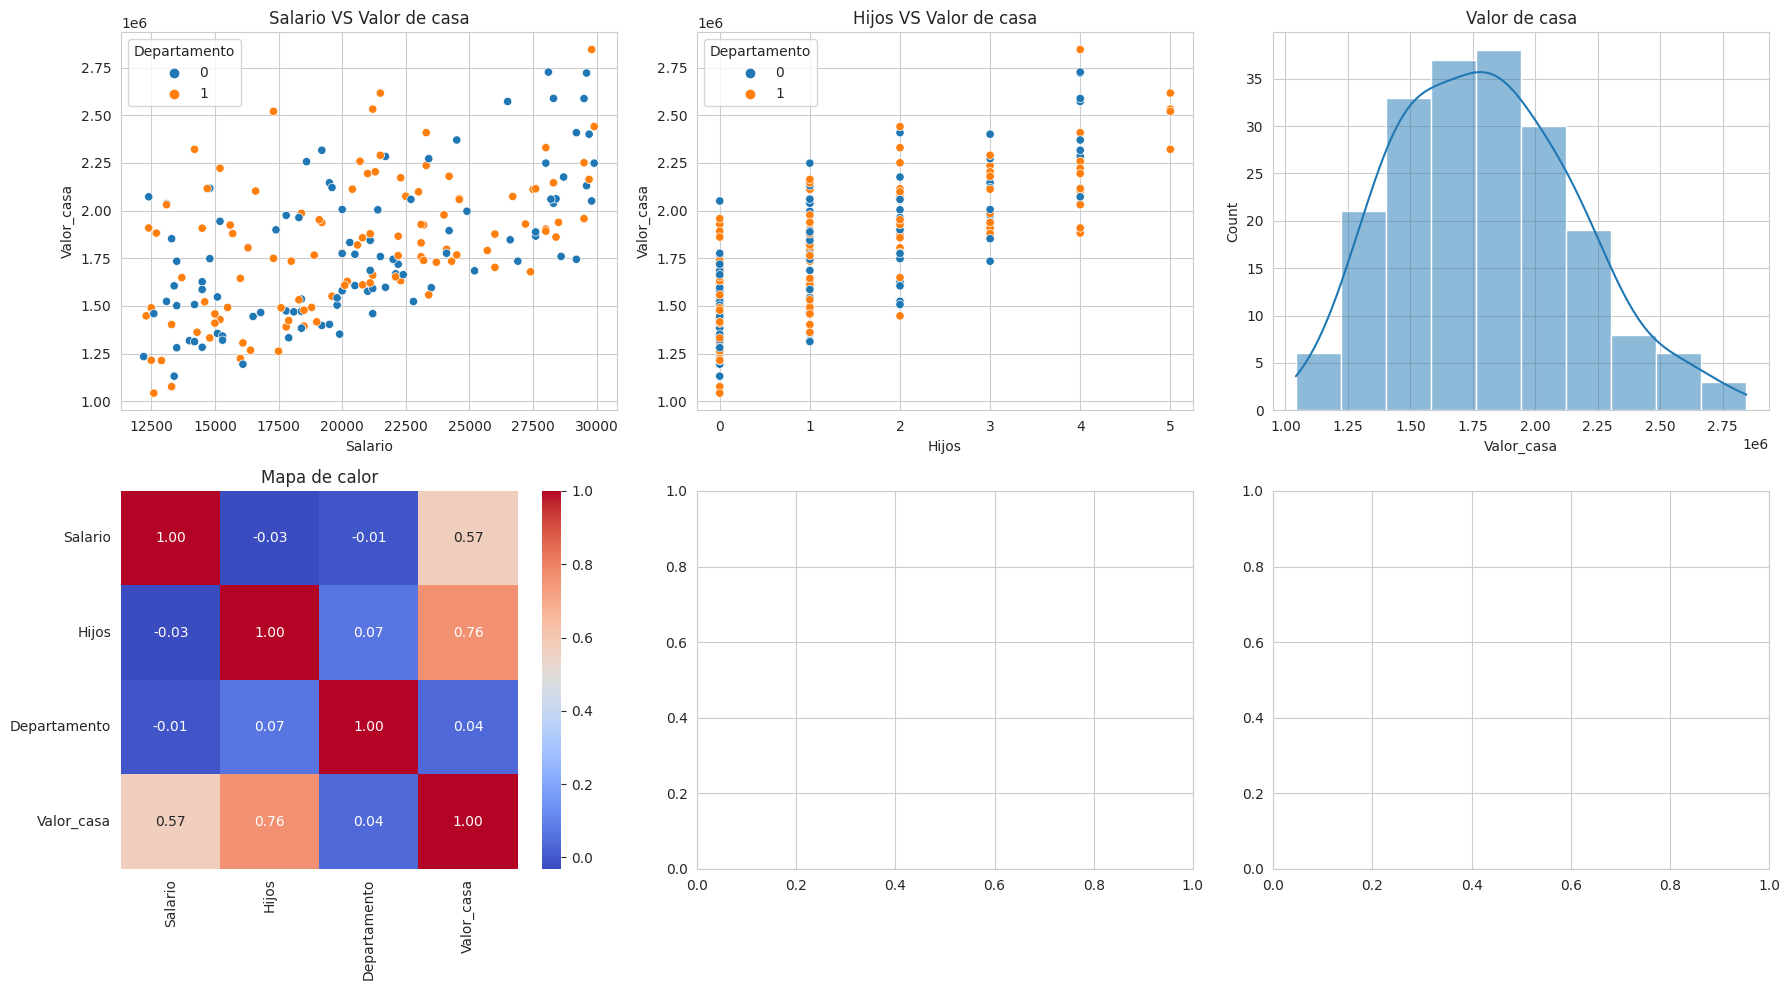

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize= (18,10))

# Crear un diagrama de dispersión para "Salario" vs. "Valor_casa"
sns.scatterplot(data=df, x="Salario", y= "Valor_casa", hue= "Departamento", ax=axes[0,0])
axes[0,0].set_title("Salario VS Valor de casa")

# Crear un diagrama de dispersión para "Hijos" vs. "Valor_casa"
sns.scatterplot(data=df, x="Hijos", y= "Valor_casa", hue= "Departamento", ax=axes[0,1])
axes[0,1].set_title("Hijos VS Valor de casa")

# Crear un gráfico de densidad para "Valor_casa"
sns.histplot(data=df, x="Valor_casa", kde=True, ax=axes[0,2])
axes[0,2].set_title("Valor de casa")

# Calcular la matriz de correlación
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1,0])
axes[1,0].set_title("Mapa de calor")

plt.tight_layout()
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

# Separar las variables independientes (X) de la variable objetivo (y)
X = df[['Salario', 'Hijos']] #La variable departamento no la crei necesaria, asi que use solo hijos y salario
y = df["Valor_casa"]  # Variable objetivo

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)




In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de regresión lineal
regression_model = LinearRegression()

# Entrenar el modelo utilizando el conjunto de entrenamiento
regression_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = regression_model.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el Coeficiente de Determinación (R^2)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas
print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R^2):", r2)


Error Cuadrático Medio (MSE): 7533795334.405847
Coeficiente de Determinación (R^2): 0.9531369626954724


In [27]:
# Primer caso: Un empleado con ingreso de 17,000 y 3 hijos
caso1 = pd.DataFrame({'Salario': [17000], 'Hijos': [3]})

# Segundo caso: Un empleado con ingreso de 15,400 y 1 hijo
caso2 = pd.DataFrame({'Salario': [15400], 'Hijos': [1]})

# Hacer predicciones para el primer caso
prediccion_caso1 = regression_model.predict(caso1)

# Hacer predicciones para el segundo caso
prediccion_caso2 = regression_model.predict(caso2)

# Imprimir las predicciones
print("Predicción para el primer caso:", prediccion_caso1)
print("Predicción para el segundo caso:", prediccion_caso2)


Predicción para el primer caso: [1960101.48580916]
Predicción para el segundo caso: [1500518.61282238]
